In [135]:
import pandas as pd
import time
import datetime
import numpy as np

In [136]:
PATH_TO_DATA = 'Data'
TEST_FILE = 'test_ds.csv'
TRAIN_FILE = 'train_ds.csv'

In [137]:
def read_data(folder, file):
    df = pd.read_csv(folder + '/' + file)
    return df

In [138]:
train_df = read_data(PATH_TO_DATA, TRAIN_FILE)

In [139]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92700 entries, 0 to 92699
Data columns (total 9 columns):
cgsettlementbufferid    92700 non-null int64
mcc                     92700 non-null int64
tranccy                 92700 non-null int64
ccy                     92700 non-null int64
amount                  92700 non-null int64
location                92700 non-null object
trandatetime            92700 non-null int64
sexid                   92700 non-null int64
clientid                92700 non-null int64
dtypes: int64(8), object(1)
memory usage: 6.4+ MB


In [140]:
train_df_index = train_df.index.tolist()

In [141]:
y_train_total = train_df['sexid']

In [142]:
len(y_train_total)

92700

In [143]:
y_train_total.to_csv('y_labels.csv', index=None)

In [144]:
cat_df = train_df.drop(['cgsettlementbufferid', 'sexid'], axis=1)

Нормализуем сумму платежа в зависимости от валюты транзакции (платежа)

In [145]:
curr_data = dict()
for curr in list(cat_df['tranccy'].unique()):
    max_curr = cat_df[cat_df['tranccy'] == curr]['amount'].max()
    min_curr = cat_df[cat_df['tranccy'] == curr]['amount'].min()
    curr_data[curr] = [max_curr, min_curr]

def min_max_amount(raw):
    if curr_data[raw['tranccy']][0] != curr_data[raw['tranccy']][1]:
        temp = (raw['amount'] - curr_data[raw['tranccy']][1]) / (curr_data[raw['tranccy']][0] - curr_data[raw['tranccy']][1])
    else:
        temp = raw['amount'] / raw['amount']
            
    return temp

cat_df['amount'] = cat_df.apply(min_max_amount, axis=1)

Просмотр на предмет объектов None после нормализации по валютам тренировочных данных поля ammount

In [146]:
for am in list(cat_df['amount'].unique()):
    if type(am) == None:
        print(am, type(am))

Обработка временных параметров в тестовых данных

In [147]:
import datetime
import time

def get_day(timestamp):
    day = datetime.datetime.fromtimestamp(timestamp).strftime('%A')
    return day

def get_week(timestamp):
    week = datetime.datetime.fromtimestamp(timestamp).strftime('%W')
    return week

def get_month(timestamp):
    month = datetime.datetime.fromtimestamp(timestamp).strftime('%B')
    return month

def get_year(timestamp):
    year = datetime.datetime.fromtimestamp(timestamp).strftime('%Y')
    return year

def get_hour(timestamp):
    hour = datetime.datetime.fromtimestamp(timestamp).strftime('%H')
    return hour

Обработка географических параметров в тестовых данных

In [148]:
def get_country(local):
    country = local[36:].strip()
    return country

def get_city(local):
    city = local[23:36].strip()
    return city

def get_inst(local):
    inst = local[0:22].strip()
    return inst

Применение к фрейму с тренировочными данными всего наработанного география и время

In [149]:
cat_df['year'] = cat_df['trandatetime'].apply(lambda x: get_year(x))
cat_df['month'] = cat_df['trandatetime'].apply(lambda x: get_month(x))
cat_df['week'] = cat_df['trandatetime'].apply(lambda x: get_week(x))
cat_df['day'] = cat_df['trandatetime'].apply(lambda x: get_day(x))
cat_df['hour'] = cat_df['trandatetime'].apply(lambda x: get_hour(x))
cat_df['country'] = cat_df['location'].apply(lambda x: get_country(x))
cat_df['city'] = cat_df['location'].apply(lambda x: get_city(x))
cat_df['institution'] = cat_df['location'].apply(lambda x: get_inst(x))

Упорядочиваем написание стран

In [150]:
print(len(sorted(cat_df['country'].unique().tolist())))

154


In [151]:
full_country_list = sorted(cat_df['country'].unique().tolist())
print(sorted(cat_df['country'].unique().tolist()))

['', '. UA', 'A UA', 'AD', 'ADAD', 'AE', 'AEAE', 'AG', 'AM', 'ARUS', 'AT', 'ATAT', 'AU', 'AUAU', 'AZ', 'AZUS', 'BB', 'BE', 'BEBE', 'BF', 'BG', 'BGBG', 'BR', 'BY', 'CAUS', 'CH', 'CHCH', 'CN', 'CNCN', 'CR', 'CW', 'CY', 'CYCY', 'CZ', 'CZCZ', 'DCUS', 'DE', 'DEDE', 'DK', 'DKDK', 'DO', 'DODO', 'EE', 'EG', 'EGEG', 'ES', 'ESES', 'FI', 'FLUS', 'FR', 'FRFR', 'GAUS', 'GB', 'GBGB', 'GE', 'GEGE', 'GH', 'GI', 'GR', 'GRGR', 'HK', 'HKHK', 'HR', 'HRHR', 'HU', 'HUHU', 'IAUS', 'ID', 'IDUS', 'IE', 'IEIE', 'IL', 'ILIL', 'ILUS', 'IN', 'ININ', 'IT', 'ITIT', 'JO', 'JPJP', 'K UA', 'KN', 'KZ', 'KZKZ', 'LK', 'LT', 'LU', 'LULU', 'LV', 'LVLV', 'MC', 'MCMC', 'MD', 'MDMD', 'MDUS', 'ME', 'MEME', 'MGMG', 'MK', 'MKMK', 'ML', 'MNUS', 'MT', 'MU', 'MUMU', 'MV', 'MY', 'NEUS', 'NJUS', 'NL', 'NLNL', 'NO', 'NONO', 'NVUS', 'NYUS', 'OHUS', 'ONCA', 'PAUS', 'PEPE', 'PL', 'PLPL', 'PR', 'PT', 'PTPT', 'PYPY', 'RO', 'RORO', 'RS', 'RSRS', 'RU', 'RURU', 'SE', 'SESE', 'SG', 'SI', 'SISI', 'SK', 'SKSK', 'SKUA', 'SN', 'TG', 'TH', 'TJ', 'TR

In [152]:
UA_list = ['. UA', 'A UA', 'UA', 'UAUA', 'UA', 'K UA']
AD_list = ['AD', 'ADAD']
AE_list = ['AE', 'AEAE']
AT_list = ['AT', 'ATAT']
AU_list = ['AU', 'AUAU']
BE_list = ['BE', 'BEBE']
BG_list = ['BG', 'BGBG']
BY_list = ['BY', 'BYBY']
US_list = ['USUS', 'UTUS', 'US', 'WAUS', 'WIUS', 'AZUS', 'DEUS', 'FLUS', 'GAUS']

In [153]:
def get_US_list(country):
    res = list()
    for con in country:
        if len(con) == 4:
            if con.endswith('US'):
                res.append(con)
    return res

def get_UA_list(country):
    res = list()
    for con in country:
        if len(con) == 4:
            if con.endswith('UA'):
                res.append(con)
    return res

In [154]:
list_US = get_US_list(sorted(cat_df['country'].unique().tolist()))
list_UA = get_UA_list(sorted(cat_df['country'].unique().tolist()))

In [155]:
print(len(list_US))
print(len(list_UA))

21
5


In [156]:
temp_country_list = set(full_country_list) - set(list_US) - set(list_UA)

In [157]:
temp_country_list

{'',
 'AD',
 'ADAD',
 'AE',
 'AEAE',
 'AG',
 'AM',
 'AT',
 'ATAT',
 'AU',
 'AUAU',
 'AZ',
 'BB',
 'BE',
 'BEBE',
 'BF',
 'BG',
 'BGBG',
 'BR',
 'BY',
 'CH',
 'CHCH',
 'CN',
 'CNCN',
 'CR',
 'CW',
 'CY',
 'CYCY',
 'CZ',
 'CZCZ',
 'DE',
 'DEDE',
 'DK',
 'DKDK',
 'DO',
 'DODO',
 'EE',
 'EG',
 'EGEG',
 'ES',
 'ESES',
 'FI',
 'FR',
 'FRFR',
 'GB',
 'GBGB',
 'GE',
 'GEGE',
 'GH',
 'GI',
 'GR',
 'GRGR',
 'HK',
 'HKHK',
 'HR',
 'HRHR',
 'HU',
 'HUHU',
 'ID',
 'IE',
 'IEIE',
 'IL',
 'ILIL',
 'IN',
 'ININ',
 'IT',
 'ITIT',
 'JO',
 'JPJP',
 'KN',
 'KZ',
 'KZKZ',
 'LK',
 'LT',
 'LU',
 'LULU',
 'LV',
 'LVLV',
 'MC',
 'MCMC',
 'MD',
 'MDMD',
 'ME',
 'MEME',
 'MGMG',
 'MK',
 'MKMK',
 'ML',
 'MT',
 'MU',
 'MUMU',
 'MV',
 'MY',
 'NL',
 'NLNL',
 'NO',
 'NONO',
 'ONCA',
 'PEPE',
 'PL',
 'PLPL',
 'PR',
 'PT',
 'PTPT',
 'PYPY',
 'RO',
 'RORO',
 'RS',
 'RSRS',
 'RU',
 'RURU',
 'SE',
 'SESE',
 'SG',
 'SI',
 'SISI',
 'SK',
 'SKSK',
 'SN',
 'TG',
 'TH',
 'TJ',
 'TR',
 'TRTR',
 'UA',
 'VN',
 'oCHCH',
 '™rCHCH'}

In [158]:
def get_double(country_list):
    res_dict = dict()
    two_letters_list = list()
    for country in country_list:
        if len(country) == 2:
            two_letters_list.append(country)
    for two in two_letters_list:
        for country in country_list:
            if len(country) == 4:
                if country.endswith(two):
                    res_dict[two] = [two, country]
    return res_dict

In [159]:
doubles_dict = get_double(temp_country_list)

In [160]:
doubles_dict['UA'] = list_UA
doubles_dict['US'] = list_US

In [161]:
num = 0
for val in doubles_dict.values():
    num += len(val)
print(num)

116


In [162]:
temp = list()
for val in doubles_dict.values():
    temp = temp + val

temp_country = list(set(full_country_list) - set(temp))
print(temp_country)

['', 'FI', 'GH', 'MY', 'AZ', 'SG', 'LT', 'MGMG', 'PYPY', 'TH', 'GI', 'SN', 'BR', 'CR', 'KN', 'PEPE', 'TJ', 'CW', 'UA', 'MV', 'LK', 'EE', 'MT', 'ID', 'VN', 'TG', 'AM', 'BB', 'PR', 'BF', '™rCHCH', 'BY', 'oCHCH', 'JO', 'JPJP', 'ONCA', 'AG', 'ML']


In [163]:
doubles_dict['UA'].append('UA')
temp_country.remove('UA')

In [164]:
doubles_dict

{'AD': ['AD', 'ADAD'],
 'AE': ['AE', 'AEAE'],
 'AT': ['AT', 'ATAT'],
 'AU': ['AU', 'AUAU'],
 'BE': ['BE', 'BEBE'],
 'BG': ['BG', 'BGBG'],
 'CH': ['CH', 'CHCH'],
 'CN': ['CN', 'CNCN'],
 'CY': ['CY', 'CYCY'],
 'CZ': ['CZ', 'CZCZ'],
 'DE': ['DE', 'DEDE'],
 'DK': ['DK', 'DKDK'],
 'DO': ['DO', 'DODO'],
 'EG': ['EG', 'EGEG'],
 'ES': ['ES', 'ESES'],
 'FR': ['FR', 'FRFR'],
 'GB': ['GB', 'GBGB'],
 'GE': ['GE', 'GEGE'],
 'GR': ['GR', 'GRGR'],
 'HK': ['HK', 'HKHK'],
 'HR': ['HR', 'HRHR'],
 'HU': ['HU', 'HUHU'],
 'IE': ['IE', 'IEIE'],
 'IL': ['IL', 'ILIL'],
 'IN': ['IN', 'ININ'],
 'IT': ['IT', 'ITIT'],
 'KZ': ['KZ', 'KZKZ'],
 'LU': ['LU', 'LULU'],
 'LV': ['LV', 'LVLV'],
 'MC': ['MC', 'MCMC'],
 'MD': ['MD', 'MDMD'],
 'ME': ['ME', 'MEME'],
 'MK': ['MK', 'MKMK'],
 'MU': ['MU', 'MUMU'],
 'NL': ['NL', 'NLNL'],
 'NO': ['NO', 'NONO'],
 'PL': ['PL', 'PLPL'],
 'PT': ['PT', 'PTPT'],
 'RO': ['RO', 'RORO'],
 'RS': ['RS', 'RSRS'],
 'RU': ['RU', 'RURU'],
 'SE': ['SE', 'SESE'],
 'SI': ['SI', 'SISI'],
 'SK': ['SK

In [165]:
len(sorted(temp_country))

37

In [166]:
for country in temp_country:
    print(country, cat_df[cat_df['country'] == country]['country'].count())

 1
FI 25
GH 33
MY 83
AZ 1
SG 60
LT 57
MGMG 3
PYPY 2
TH 201
GI 22
SN 1
BR 12
CR 12
KN 5
PEPE 1
TJ 1
CW 2
MV 7
LK 1
EE 3
MT 56
ID 26
VN 1
TG 1
AM 3
BB 2
PR 1
BF 1
™rCHCH 4
BY 21
oCHCH 1
JO 4
JPJP 2
ONCA 2
AG 2
ML 2


In [167]:
doubles_dict['MT'] = ['MT', 'MTMT']
doubles_dict['BR'] = ['BR', 'BRBR']
doubles_dict['FI'] = ['FI', 'FIFI']
doubles_dict['TH'] = ['TH', 'THTH']
doubles_dict['GH'] = ['GH', 'GHGH']
doubles_dict['ID'] = ['ID', 'IDID']
doubles_dict['CR'] = ['CR', 'CRCR']
doubles_dict['CA'] = ['CA','ONCA', 'CACA']
doubles_dict['SG'] = ['SG', 'SGSG']

In [168]:
temp_country = list(set(temp_country) - set(['MT', 'BR', 'FI', 'TH', 'GH', 'ID', 'CR', 'ONCA', 'CACA', 'SG']))

In [169]:
temp_country

['',
 'MY',
 'AZ',
 'LT',
 'MGMG',
 'PYPY',
 'SN',
 'GI',
 'KN',
 'PEPE',
 'TJ',
 'CW',
 'MV',
 'LK',
 'EE',
 'VN',
 'TG',
 'AM',
 'BB',
 'PR',
 'BF',
 '™rCHCH',
 'BY',
 'oCHCH',
 'JO',
 'JPJP',
 'AG',
 'ML']

In [170]:
doubles_dict['NDFCountry'] = temp_country

In [171]:
doubles_dict

{'AD': ['AD', 'ADAD'],
 'AE': ['AE', 'AEAE'],
 'AT': ['AT', 'ATAT'],
 'AU': ['AU', 'AUAU'],
 'BE': ['BE', 'BEBE'],
 'BG': ['BG', 'BGBG'],
 'BR': ['BR', 'BRBR'],
 'CA': ['CA', 'ONCA', 'CACA'],
 'CH': ['CH', 'CHCH'],
 'CN': ['CN', 'CNCN'],
 'CR': ['CR', 'CRCR'],
 'CY': ['CY', 'CYCY'],
 'CZ': ['CZ', 'CZCZ'],
 'DE': ['DE', 'DEDE'],
 'DK': ['DK', 'DKDK'],
 'DO': ['DO', 'DODO'],
 'EG': ['EG', 'EGEG'],
 'ES': ['ES', 'ESES'],
 'FI': ['FI', 'FIFI'],
 'FR': ['FR', 'FRFR'],
 'GB': ['GB', 'GBGB'],
 'GE': ['GE', 'GEGE'],
 'GH': ['GH', 'GHGH'],
 'GR': ['GR', 'GRGR'],
 'HK': ['HK', 'HKHK'],
 'HR': ['HR', 'HRHR'],
 'HU': ['HU', 'HUHU'],
 'ID': ['ID', 'IDID'],
 'IE': ['IE', 'IEIE'],
 'IL': ['IL', 'ILIL'],
 'IN': ['IN', 'ININ'],
 'IT': ['IT', 'ITIT'],
 'KZ': ['KZ', 'KZKZ'],
 'LU': ['LU', 'LULU'],
 'LV': ['LV', 'LVLV'],
 'MC': ['MC', 'MCMC'],
 'MD': ['MD', 'MDMD'],
 'ME': ['ME', 'MEME'],
 'MK': ['MK', 'MKMK'],
 'MT': ['MT', 'MTMT'],
 'MU': ['MU', 'MUMU'],
 'NDFCountry': ['',
  'MY',
  'AZ',
  'LT',
  'MG

In [172]:
num = 0
for val in doubles_dict.values():
    num += len(val)
print(num)

164


In [173]:
len(list(doubles_dict.keys()))

57

In [174]:
doubles_dict.keys()

dict_keys(['HR', 'AD', 'SI', 'EG', 'TR', 'MD', 'RS', 'DK', 'DO', 'LV', 'RU', 'SE', 'IN', 'FR', 'GB', 'DE', 'HK', 'AU', 'CN', 'MC', 'PT', 'CY', 'AE', 'RO', 'GE', 'GR', 'BG', 'KZ', 'PL', 'IT', 'IL', 'ES', 'LU', 'MK', 'BE', 'CZ', 'SK', 'IE', 'NL', 'ME', 'MU', 'AT', 'NO', 'CH', 'HU', 'UA', 'US', 'MT', 'BR', 'FI', 'TH', 'GH', 'ID', 'CR', 'CA', 'SG', 'NDFCountry'])

In [175]:
def get_normal_country(country):
    temp = 'NDFCountry'
    for key in doubles_dict.keys():
        if country in doubles_dict[key]:
            temp = key
    return temp

In [176]:
cat_df['country'] = cat_df['country'].apply(lambda x: get_normal_country(x))

In [177]:
len(cat_df['country'].unique().tolist())

57

In [178]:
cat_df['country']

0        ES
1        ES
2        ES
3        ES
4        ES
5        ES
6        ES
7        ES
8        ES
9        ES
10       ES
11       ES
12       ES
13       ES
14       GH
15       GH
16       GH
17       US
18       UA
19       UA
20       UA
21       UA
22       UA
23       UA
24       UA
25       UA
26       UA
27       UA
28       UA
29       UA
         ..
92670    UA
92671    UA
92672    UA
92673    UA
92674    UA
92675    UA
92676    UA
92677    UA
92678    UA
92679    UA
92680    UA
92681    UA
92682    UA
92683    UA
92684    UA
92685    UA
92686    UA
92687    UA
92688    UA
92689    UA
92690    UA
92691    UA
92692    UA
92693    UA
92694    UA
92695    UA
92696    UA
92697    UA
92698    UA
92699    UA
Name: country, Length: 92700, dtype: object

Упорядочиваем написание городов по доступной возможности

In [179]:
print(sorted(cat_df['city'].unique().tolist()))

['+34976362127', '+357-22514442', '+441273852359', '+442070237556', '+74957270606', '-GRANDATE', '-PIAVE', '-S.GIOVANNI', '.DONA DI PIAV', '.MILANO EST', '000000060001/', '000000750801/', '000000750806/', '000000750807/', '00VISA DIRECT', '019281199', '02072339533', '02077561000', '03336661000', '06200', '06211', '06300', '06ANTIBES', '06CANNES', '06CANNES(((30', '06CANNES(((37', '06GRASSE', '06MENTON', '06NICE', '06ROQUEBRUNE', '06SNG1 CB', '06SNI1 CB', '06SNI5 CB', '06ST JEAN CAP', '06ST LAURENT', '06ST PAUL', '06ST PAUL VEN', '06VILLEFRANCH', '08000304238', '08002889949', '08005434835', '08009666546', '0845 900 1234', '08456025612', '08669642867', '0870070191', '0CHINA0000000', '1', '1-888-3009348', '11 XLM EO', '12 ATLANTIC B', '14DEAUVILLE', '14HONFLEUR', '2022764906', '2024996427', '20260 KORCULA', '206-632-2421', '2127777001', '2623', '26VISA DIRECT', '2DUBLIN', '305-3548306', '3054167445', '3055382273', '3055384757', '310-8294343', '3104407300', '3106016899', '3122815333', '323

In [180]:
import csv

cities_dict = dict()
with open(PATH_TO_DATA + '/' + 'cities_list.csv','r') as data:
    reader = csv.reader(data)
    for line in reader:
        line[:] = [item for item in line if item != '']
        cities_dict[line[0]] = sorted(list(set(line)))
cities_dict

{'ABU DHABI': ['ABU DHABI'],
 'ACCRA': ['ACCRA'],
 'ALCHEVSK': ['ALCHEVSK'],
 'ALMATY': ['ALMATY'],
 'AMSTERDAM': ['AMSTELVEEN', 'AMSTERDAM', 'Amsterdam'],
 'ANDORRA': ['ANDORRA', 'ANDORRA LA VE'],
 'ANKARA': ['ANKARA'],
 'ANTALYA': ['ANTALYA'],
 'ANTIBES': ['ANTIBES'],
 'ATHINA': ['ATHINA', 'Athens'],
 'BALAKLEYA': ['BALAKLEYA', 'Balakliya'],
 'BALI': ['BALI', 'BALI DENPASAR', 'BALI KUTA'],
 'BANGKOK': ['BANGKOK', 'Bangkok'],
 'BAR': ['BAR', 'Bar'],
 'BARANYNTSI': ['BARANINTSY', 'BARANYNSI', 'BARANYNTSI'],
 'BARCELONA': ['BARCELLONA', 'BARCELONA', 'Barcelona'],
 'BELAYA TSERKO': ['B TSERKOV',
  'B.TSERKVA',
  'BELAYA TSERKO',
  'BILA CERKVA',
  'BILA TSERKVA',
  'Bila Tserkva'],
 'BELGOROD': ['BELG.-DNESTR.', 'BELGOROD', 'BELGORODSKY R'],
 'BERLIN': ['BERLIN', 'Berlin'],
 'BOLSHIE LAZY': ['BOLSHIE LAZY'],
 'BORYSPIL': ['AEROPORT BORY',
  'BORISPIL',
  'BORISPOL',
  'BORYSPIL',
  "BORYSPIL'",
  'BORYSPIL-7',
  'BORYSPOL'],
 'BOYARKA': ['BOYARKA'],
 'BROVARY': ['BROVARI', 'BROVARY', 'Br

In [181]:
def get_normal_city(city):
    for key in cities_dict.keys():
        #print(key, city)
        for city_d in cities_dict[key]:
            #print(city, city_d)
            if city == city_d:              
                return key
                break
    else:
        return 'no city'

In [182]:
cat_df['city'] = cat_df['city'].apply(lambda x: get_normal_city(x))

In [183]:
sorted(list(cat_df['city'].unique()))

['ABU DHABI',
 'ACCRA',
 'ALMATY',
 'AMSTERDAM',
 'ANDORRA',
 'ANKARA',
 'ANTALYA',
 'ANTIBES',
 'ATHINA',
 'BALAKLEYA',
 'BALI',
 'BANGKOK',
 'BARANYNTSI',
 'BARCELONA',
 'BELAYA TSERKO',
 'BELGOROD',
 'BERLIN',
 'BOLSHIE LAZY',
 'BORYSPIL',
 'BOYARKA',
 'BROVARY',
 'BUCHA',
 'BUDAPEST',
 'BUZOVA',
 'CAIRO',
 'CANNES',
 'CHERKASSY',
 'CHERNIVTSI',
 'CHICAGO',
 'DERGACHI',
 'DNDZERZHYNSK',
 'DNEPROPETR-SK',
 'DOKUCHAEVSK',
 'DONETSK',
 'DRESDEN',
 'DUBAI',
 'DUBLIN',
 'DUBOVOE',
 'DUESSELDORF',
 'FIRENZE',
 'FRANKFURT',
 'FURMANKA',
 'GIBRALTAR',
 'GORA',
 'GOSTOMEL',
 'HANGZHOU',
 'HODOSIVKA',
 'ILYICHEVSK',
 'IRPIN',
 'IRSHAVA',
 'ISTANBUL',
 'IVANO-FRANK.',
 'KALYNIVKA',
 'KARLIVKA',
 'KHARKOV',
 'KHIMKI',
 'KHMELNITSKIY',
 'KINCHESH',
 'KIROVOGRAD',
 'KISVARDA',
 'KLYACHANOVO',
 'KOROSTEN',
 'KOROVIYA',
 'KRAKOVETS',
 'KRAKOW',
 'KREMENCHUG',
 'KUALA LUMPUR',
 'KYIV',
 'LADYZHYNKA',
 'LAS VEGAS',
 'LEICESTER',
 'LISBOA',
 'LITIN',
 'LONDON',
 'LOS ANGELES',
 'LUTSK',
 'LVOV',
 'LYP

Упорядочиваем код операций в тренировочных данных

In [184]:
popularity_mcc = list()
for mcc in sorted(cat_df['mcc'].unique()):
    popularity_mcc.append((mcc, cat_df[cat_df['mcc'] == mcc]['mcc'].count()))
sort_mcc = sorted(popularity_mcc, key=lambda x: x[1], reverse=True)

In [185]:
sort_mcc

[(6010, 13909),
 (5411, 13342),
 (5499, 11373),
 (6011, 9027),
 (5812, 7097),
 (5541, 5740),
 (5912, 2774),
 (4899, 2126),
 (6012, 2009),
 (4814, 1927),
 (5814, 1729),
 (6536, 1659),
 (5977, 1360),
 (5651, 1150),
 (5211, 1029),
 (4112, 845),
 (4812, 776),
 (4900, 766),
 (5331, 744),
 (7011, 741),
 (5691, 646),
 (5813, 504),
 (6538, 504),
 (5661, 446),
 (5441, 417),
 (7995, 364),
 (4511, 357),
 (7399, 357),
 (7832, 322),
 (5641, 304),
 (5968, 298),
 (5311, 282),
 (4722, 280),
 (5964, 268),
 (5722, 259),
 (6051, 227),
 (4816, 224),
 (5309, 222),
 (7230, 210),
 (5945, 208),
 (5941, 205),
 (5631, 192),
 (5921, 182),
 (5655, 174),
 (8999, 170),
 (5621, 154),
 (7311, 146),
 (5942, 144),
 (5732, 141),
 (7997, 140),
 (5999, 139),
 (5169, 128),
 (4784, 126),
 (5947, 116),
 (8099, 109),
 (5699, 107),
 (5712, 103),
 (7922, 101),
 (5944, 95),
 (5399, 93),
 (5995, 93),
 (7298, 84),
 (7523, 80),
 (5200, 79),
 (5611, 76),
 (4121, 75),
 (9399, 73),
 (7999, 71),
 (5735, 66),
 (7210, 64),
 (5734, 62),
 

In [186]:
avia = list(range(3000,3301))
veterinary = [742]
agricultural = [763]
general_contractor = [1520]
carpentry_contractors = [1750]
miscellaneous_publishing_and_printing = [2741]
car_rental_agencies = list(range(3351,3441))
hotels_motels_resorts = list(range(3501,3836))
railroads = [4011]
commuter_passenger_transportation = [4111]
passenger_railways = [4112]
ambulance_services = [4119]
taxicabs_limousines = [4121]
bus_lines = [4131]
motor_freight_carriers_and_trucking = [4214]
courier_services = [4215]
public_warehousing_and_storage = [4225]
steamship_and_cruise_lines = [4411]
boat_rentals_and_leasing = [4457]
marinas_marine_service = [4468]
airlines_and_air_carriers = [4511]
airports_flying_fields_and_airport_terminals = [4582]
travel_agencies = [4722]
tolls_and_bridge_fees = [4784]
transportation_services = [4789]
telecommunication_equipment = [4812]
telecommunication_services = [4814]
computer_network = [4816]
money_transfer = [4829]
cable_satellite_and_other_pay_television = [4899]
utilities_electric_gas_water_and_sanitary = [4900]
motor_vehicle_supplies_and_new_parts = [5013]
office_and_commercial_furniture = [5021]
manual_cash_disbursements = [6010]
automated_cash_disbursements = [6011]
grocery_stores_and_supermarkets = [5411]
miscellaneous_food_stores = [5499]
eating_places_and_restaurants = [5812]
candy_nut_and_Confectionery_stores = [5541]
drug_stores_and_pharmacies = [5912]
merchandise_services_and_debt_repayment = [6012]
mastercard_moneysend = list(range(6536,6538))
fast_food_restaurants = [5814]
cosmetic_stores = [5977]
family_clothing_stores = [5651]
lumber_building_materials_stores = [5211]
variety_stores = [5331]
hotels_motels_and_resorts = [7011]
men_s_women_s_clothing_stores = [5691]
drinking_places = [5813]
shoe_stores = [5661]
confectionery = [5441]
miscellaneous_business_services = [7399]
motion_picture_theaters_cinema = [7832]
betting_casino_gambling = [7995]
department_stores = [5311]
direct_marketing_merchant = [5968]
children_s_and_infants_wear_stores = [5641]
non_financial_institutions = [6051]
household_appliance_stores = [5722]
direct_marketing_catalog_merchant = [5964]
sporting_goods_stores = [5941]
duty_free_stores = [5309]
hobby_toy_and_game_shops = [5945]
sports_and_riding_apparel_stores = [5655]
beauty_and_barber_shops = [7230]
women_s_accessory_and_specialty_shops = [5631]
package_stores_beer_wine_and_liquor = [5921]
women_s_ready_to_wear_stores = [5621]
professional_services = [8999]
miscellaneous_and_specialty_retail_shops = [5999]
book_stores = [5942]
advertising_services = [7311]
video_game_arcades_establishments = [7994]
electronics_stores = [5732]
chemicals_and_allied_products = [5169]
membership_clubs_sports_recreation_athletic = [7997]
gift_card_novelty_and_souvenir_shops = [5947]
jewelry_stores_watches_clocks_and_silverware_stores = [5944]
medical_services_and_health_practitioners = [8099]
miscellaneous_apparel_and_accessory_shops = [5699]
ticket_agencies_and_theatrical_producers = [7922]
pet_shops_pet_foods_and_supplies_stores = [5995]
furniture_home_furnishings_and_equipment_stores = [5712]
men_s_and_boys_clothing_and_accessories_stores = [5611]
miscellaneous_general_merchandise = [5399]
health_and_beauty_spas = [7298]
home_supply_warehouse_stores = [5200]
record_stores = [5735]
recreation_services = [7999]
parking_lots_parking_meters_and_garages = [7523]
used_merchandise_and_secondhand_stores = [5931]
government_services = [9399]
US_federal_government_agencies_or_departments = [9405]
computer_software_stores = [5734]
stationery_stores_office_and_school_supply_stores = [5943]
florists_supplies_nursery_stock_and_flowers = [5193]
freezer_and_locker_meat_provisioners = [5422]
laundry_cleaning_and_garment_services = [7210]
florists = [5992]
opticians_optical_goods_and_eyeglasses = [8043]
automotive_parts_and_accessories_stores = [5533]
medical_and_dental_laboratories = [8071]
car_rental_agencies = [7512]
cigar_stores_and_stands = [5993]
commercial_sports_professional_sports_clubs = [7941]
tourist_attractions_and_exhibits = [7991]
dairy_products_stores = [5451]
miscellaneous_personal_services = [7299]
glassware_crystal_stores = [5950]
miscellaneous_home_furnishing_specialty_stores = [5719]
luggage_and_leather_goods_stores = [5948]
sewing_needlework_fabric_and_piece_goods_stores = [5949]
information_retrieval_services = [7375]
motion_picture_and_video_tape_production_and_distribution = [7829]
dentists_and_orthodontists = [8021]
computers_and_computer_peripheral_equipment_and_software = [5045]
fuel_dealers_fuel_oil_wood_coal_and_liquefied_petroleum = [5983]
bakeries_0 = [5462]
charitable_social_service_organizations = [8398]

In [187]:
mcc_coding_list = (avia, veterinary, agricultural, general_contractor, carpentry_contractors, miscellaneous_publishing_and_printing, 
car_rental_agencies, hotels_motels_resorts, railroads, commuter_passenger_transportation, passenger_railways,
ambulance_services, taxicabs_limousines, bus_lines, motor_freight_carriers_and_trucking, courier_services, 
public_warehousing_and_storage, steamship_and_cruise_lines, boat_rentals_and_leasing, marinas_marine_service, 
airlines_and_air_carriers, airports_flying_fields_and_airport_terminals, travel_agencies, tolls_and_bridge_fees,
transportation_services, telecommunication_equipment, telecommunication_services, computer_network, money_transfer,
cable_satellite_and_other_pay_television, utilities_electric_gas_water_and_sanitary, motor_vehicle_supplies_and_new_parts,
office_and_commercial_furniture, manual_cash_disbursements, automated_cash_disbursements, grocery_stores_and_supermarkets,
miscellaneous_food_stores, eating_places_and_restaurants, candy_nut_and_Confectionery_stores, drug_stores_and_pharmacies,
merchandise_services_and_debt_repayment, mastercard_moneysend, fast_food_restaurants, cosmetic_stores, family_clothing_stores,
lumber_building_materials_stores, variety_stores, hotels_motels_and_resorts, men_s_women_s_clothing_stores, drinking_places,
shoe_stores, confectionery, miscellaneous_business_services, motion_picture_theaters_cinema, betting_casino_gambling,
department_stores, direct_marketing_merchant, children_s_and_infants_wear_stores, non_financial_institutions,
household_appliance_stores, direct_marketing_catalog_merchant, sporting_goods_stores, duty_free_stores, hobby_toy_and_game_shops,
sports_and_riding_apparel_stores, beauty_and_barber_shops, women_s_accessory_and_specialty_shops, package_stores_beer_wine_and_liquor,
women_s_ready_to_wear_stores, professional_services, miscellaneous_and_specialty_retail_shops, book_stores, advertising_services,
video_game_arcades_establishments, electronics_stores, chemicals_and_allied_products, membership_clubs_sports_recreation_athletic,
gift_card_novelty_and_souvenir_shops, jewelry_stores_watches_clocks_and_silverware_stores, medical_services_and_health_practitioners,
miscellaneous_apparel_and_accessory_shops, ticket_agencies_and_theatrical_producers, pet_shops_pet_foods_and_supplies_stores,
furniture_home_furnishings_and_equipment_stores, men_s_and_boys_clothing_and_accessories_stores, miscellaneous_general_merchandise,
health_and_beauty_spas, home_supply_warehouse_stores, record_stores, recreation_services, parking_lots_parking_meters_and_garages,
used_merchandise_and_secondhand_stores, government_services, US_federal_government_agencies_or_departments, computer_software_stores,
stationery_stores_office_and_school_supply_stores, florists_supplies_nursery_stock_and_flowers, freezer_and_locker_meat_provisioners,
laundry_cleaning_and_garment_services, florists, opticians_optical_goods_and_eyeglasses, automotive_parts_and_accessories_stores,
medical_and_dental_laboratories, car_rental_agencies, cigar_stores_and_stands, commercial_sports_professional_sports_clubs,
tourist_attractions_and_exhibits, dairy_products_stores, miscellaneous_personal_services, glassware_crystal_stores,
miscellaneous_home_furnishing_specialty_stores, luggage_and_leather_goods_stores, sewing_needlework_fabric_and_piece_goods_stores,
information_retrieval_services, motion_picture_and_video_tape_production_and_distribution, dentists_and_orthodontists,
computers_and_computer_peripheral_equipment_and_software, fuel_dealers_fuel_oil_wood_coal_and_liquefied_petroleum,
bakeries_0, charitable_social_service_organizations)

In [188]:
mcc_res_dict = dict()
for element in mcc_coding_list:
    mcc_res_dict[mcc_coding_list.index(element)] = element
mcc_res_dict   

{0: [3000,
  3001,
  3002,
  3003,
  3004,
  3005,
  3006,
  3007,
  3008,
  3009,
  3010,
  3011,
  3012,
  3013,
  3014,
  3015,
  3016,
  3017,
  3018,
  3019,
  3020,
  3021,
  3022,
  3023,
  3024,
  3025,
  3026,
  3027,
  3028,
  3029,
  3030,
  3031,
  3032,
  3033,
  3034,
  3035,
  3036,
  3037,
  3038,
  3039,
  3040,
  3041,
  3042,
  3043,
  3044,
  3045,
  3046,
  3047,
  3048,
  3049,
  3050,
  3051,
  3052,
  3053,
  3054,
  3055,
  3056,
  3057,
  3058,
  3059,
  3060,
  3061,
  3062,
  3063,
  3064,
  3065,
  3066,
  3067,
  3068,
  3069,
  3070,
  3071,
  3072,
  3073,
  3074,
  3075,
  3076,
  3077,
  3078,
  3079,
  3080,
  3081,
  3082,
  3083,
  3084,
  3085,
  3086,
  3087,
  3088,
  3089,
  3090,
  3091,
  3092,
  3093,
  3094,
  3095,
  3096,
  3097,
  3098,
  3099,
  3100,
  3101,
  3102,
  3103,
  3104,
  3105,
  3106,
  3107,
  3108,
  3109,
  3110,
  3111,
  3112,
  3113,
  3114,
  3115,
  3116,
  3117,
  3118,
  3119,
  3120,
  3121,
  3122,
  3123,
  312

In [189]:
def get_normal_mcc(mcc):
    for key in mcc_res_dict.keys():
        #print(key, city)
        for mcc_d in mcc_res_dict[key]:
            #print(type(mcc), type(mcc_d))
            if mcc == mcc_d:              
                return key
                break
    else:
        return 'no mcc'

In [190]:
cat_df['mcc'] = cat_df['mcc'].apply(lambda x: get_normal_mcc(x))

In [191]:
len(list(cat_df['mcc'].unique()))

119

Упорядочиваем валюту карты и платежа

In [192]:
list(cat_df['ccy'].unique())

[980, 978, 840]

In [193]:
list(cat_df['tranccy'].unique())

[978,
 936,
 840,
 980,
 949,
 348,
 784,
 826,
 643,
 952,
 941,
 807,
 756,
 52,
 156,
 191,
 985,
 376,
 975,
 981,
 440,
 203,
 480,
 188,
 946,
 764,
 398,
 974,
 36,
 578,
 458,
 752,
 124,
 360,
 702,
 356,
 462,
 144,
 498,
 344,
 818,
 600,
 986,
 400,
 208,
 214,
 51,
 392]

In [194]:
len(list(cat_df['tranccy'].unique()))

48

In [195]:
popularity_ccy = list()
for ccy in sorted(cat_df['ccy'].unique()):
    popularity_ccy.append((ccy, cat_df[cat_df['ccy'] == ccy]['ccy'].count()))
sort_ccy = sorted(popularity_ccy, key=lambda x: x[1], reverse=True)

In [196]:
sort_ccy

[(980, 92567), (978, 70), (840, 63)]

In [197]:
popularity_tranccy = list()
for tranccy in sorted(cat_df['tranccy'].unique()):
    popularity_tranccy.append((tranccy, cat_df[cat_df['tranccy'] == tranccy]['tranccy'].count()))
sort_tranccy = sorted(popularity_tranccy, key=lambda x: x[1], reverse=True)

In [198]:
len(sort_tranccy)

48

In [199]:
sort_tranccy

[(980, 84048),
 (978, 2988),
 (840, 2183),
 (643, 879),
 (826, 462),
 (348, 417),
 (985, 351),
 (764, 201),
 (949, 160),
 (376, 144),
 (36, 129),
 (203, 104),
 (458, 83),
 (756, 77),
 (784, 61),
 (946, 52),
 (191, 41),
 (702, 38),
 (936, 33),
 (156, 27),
 (360, 26),
 (941, 22),
 (807, 20),
 (398, 18),
 (974, 18),
 (975, 17),
 (214, 13),
 (986, 12),
 (981, 10),
 (498, 8),
 (578, 8),
 (188, 7),
 (818, 5),
 (952, 5),
 (208, 4),
 (440, 4),
 (51, 3),
 (356, 3),
 (400, 3),
 (480, 3),
 (52, 2),
 (124, 2),
 (392, 2),
 (600, 2),
 (752, 2),
 (144, 1),
 (344, 1),
 (462, 1)]

In [200]:
def money_exchange(row):
    if row['ccy'] == row['tranccy']:
        row['exchenge'] = 0.0
    else:
        row['exchenge'] = 1.0
    return row

In [201]:
cat_df = cat_df.apply(money_exchange, axis=1)

In [202]:
category_to_dummies = ['mcc', 'tranccy', 'ccy', 'year', 'month', 'week', 'day', 'hour', 'country', 'city']

In [203]:
for cat in category_to_dummies:
    dummies = pd.get_dummies(cat_df[cat])
    #dummies.info()
    cat_df = pd.concat([cat_df, dummies], axis=1)
    
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92700 entries, 0 to 92699
Columns: 490 entries, mcc to no city
dtypes: float64(2), int64(4), object(10), uint8(474)
memory usage: 53.2+ MB


In [204]:
cat_df_ready = cat_df.drop(['mcc', 'tranccy', 'ccy', 'year', 'month', 'week', 'day', 'hour', 'country', 'city', 'institution', 'location', 'trandatetime', 'clientid'], axis=1)

In [205]:
cat_df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92700 entries, 0 to 92699
Columns: 476 entries, amount to no city
dtypes: float64(2), uint8(474)
memory usage: 43.3 MB


In [206]:
cat_df_ready.columns.tolist()

['amount',
 'exchenge',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 'no mcc',
 36,
 51,
 52,
 124,
 144,
 156,
 188,
 191,
 203,
 208,
 214,
 344,
 348,
 356,
 360,
 376,
 392,
 398,
 400,
 440,
 458,
 462,
 480,
 498,
 578,
 600,
 643,
 702,
 752,
 756,
 764,
 784,
 807,
 818,
 826,
 840,
 936,
 941,
 946,
 949,
 952,
 974,
 975,
 978,
 980,
 981,
 985,
 986,
 840,
 978,
 980,
 '2013',
 '2014',
 '2015',
 'April',
 'August',
 'December',
 '

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(cat_df_ready, y_train_total, test_size=0.25, random_state=42)
model = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.62      0.68      0.65      8908
          1       0.79      0.73      0.76     14267

avg / total       0.72      0.72      0.72     23175



In [208]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[10, 20, 40, 80, 160, 320, 640],
     'max_features':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50],
     'max_depth':[4,5,6,7,8,9,10]},
]

forest_class = RandomForestClassifier()

grid_search = GridSearchCV(forest_class, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

grid_search.fit(cat_df_ready, y_train_total)

forest_cls = grid_search.best_estimator_

print('RandomForest best params', '\n', grid_search.best_params_)

forest_cv_res = grid_search.cv_results_

for mean_score, params in zip(forest_cv_res['mean_test_score'], forest_cv_res['params']):
    print(mean_score, params)

Fitting 5 folds for each of 490 candidates, totalling 2450 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 2450 out of 2450 | elapsed: 28.7min finished


RandomForest best params 
 {'max_depth': 7, 'max_features': 10, 'n_estimators': 20}
0.5115453062594114 {'max_depth': 1, 'max_features': 1, 'n_estimators': 10}
0.5193026387686436 {'max_depth': 1, 'max_features': 1, 'n_estimators': 20}
0.5217529918814603 {'max_depth': 1, 'max_features': 1, 'n_estimators': 40}
0.5346914687325388 {'max_depth': 1, 'max_features': 1, 'n_estimators': 80}
0.5586180881017949 {'max_depth': 1, 'max_features': 1, 'n_estimators': 160}
0.568400614215752 {'max_depth': 1, 'max_features': 1, 'n_estimators': 320}
0.568442072914984 {'max_depth': 1, 'max_features': 1, 'n_estimators': 640}
0.5078863942088029 {'max_depth': 1, 'max_features': 2, 'n_estimators': 10}
0.5326822838355724 {'max_depth': 1, 'max_features': 2, 'n_estimators': 20}
0.559612367674174 {'max_depth': 1, 'max_features': 2, 'n_estimators': 40}
0.52745722890734 {'max_depth': 1, 'max_features': 2, 'n_estimators': 80}
0.579916747686823 {'max_depth': 1, 'max_features': 2, 'n_estimators': 160}
0.5781518000380461

In [209]:
forest_cls.fit(X_train, y_train)
y_pred_forest = forest_cls.predict(X_test)
print(classification_report(y_pred_forest, y_test))

             precision    recall  f1-score   support

          0       0.04      0.83      0.07       421
          1       0.99      0.58      0.73     22754

avg / total       0.98      0.59      0.72     23175



In [210]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_forest)

0.5149362499995624

In [211]:
from sklearn.ensemble import AdaBoostClassifier

param_grid = [
    {'n_estimators':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
     'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
]

AdaBoost_class = AdaBoostClassifier()

AdaBoost_grid_search = GridSearchCV(AdaBoost_class, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

AdaBoost_grid_search.fit(cat_df_ready, y_train_total)

AdaBoost_cls = AdaBoost_grid_search.best_estimator_

print('AdaBoost best params', '\n', AdaBoost_grid_search.best_params_)

AdaBoost_cv_res = AdaBoost_grid_search.cv_results_

for mean_score, params in zip(AdaBoost_cv_res['mean_test_score'], AdaBoost_cv_res['params']):
    print(mean_score, params)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 21.2min finished


AdaBoost best params 
 {'learning_rate': 0.4, 'n_estimators': 50}
0.5646990885025013 {'learning_rate': 0.1, 'n_estimators': 10}
0.5699287626050289 {'learning_rate': 0.1, 'n_estimators': 20}
0.5824123096049125 {'learning_rate': 0.1, 'n_estimators': 30}
0.5901601515793887 {'learning_rate': 0.1, 'n_estimators': 40}
0.5869146876000468 {'learning_rate': 0.1, 'n_estimators': 50}
0.5893397188020678 {'learning_rate': 0.1, 'n_estimators': 60}
0.5892018023976685 {'learning_rate': 0.1, 'n_estimators': 70}
0.5908499261154398 {'learning_rate': 0.1, 'n_estimators': 80}
0.5923532485394576 {'learning_rate': 0.1, 'n_estimators': 90}
0.5926987508311983 {'learning_rate': 0.1, 'n_estimators': 100}
0.5728059005406613 {'learning_rate': 0.2, 'n_estimators': 10}
0.5904109699681912 {'learning_rate': 0.2, 'n_estimators': 20}
0.5861827728080679 {'learning_rate': 0.2, 'n_estimators': 30}
0.5918097782922018 {'learning_rate': 0.2, 'n_estimators': 40}
0.5919387284814648 {'learning_rate': 0.2, 'n_estimators': 50}
0.5

In [212]:
AdaBoost_cls.fit(X_train, y_train)
y_pred_ada = AdaBoost_cls.predict(X_test)
print(classification_report(y_pred_ada, y_test))

             precision    recall  f1-score   support

          0       0.33      0.63      0.44      5219
          1       0.85      0.63      0.73     17956

avg / total       0.74      0.63      0.66     23175



In [213]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_ada)

0.5935748428815306

In [214]:
from sklearn.linear_model import LogisticRegression

param_grid = [
    {'max_iter':[100, 200, 300],
     'C':[0.001, 0.01, 0.1, 1, 10],
     'solver' : ['newton-cg', 'sag', 'lbfgs']}
]

LogReg_class = LogisticRegression()

LogReg_grid_search = GridSearchCV(LogReg_class, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

LogReg_grid_search.fit(cat_df_ready, y_train_total)

LogReg_class_cls = LogReg_grid_search.best_estimator_

print('LogReg best params', '\n', LogReg_grid_search.best_params_)

LogReg_class_cv_res = LogReg_grid_search.cv_results_

for mean_score, params in zip(LogReg_class_cv_res['mean_test_score'], LogReg_class_cv_res['params']):
    print(mean_score, params)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed: 26.8min finished


LogReg best params 
 {'C': 0.001, 'max_iter': 200, 'solver': 'sag'}
0.5996850645473981 {'C': 0.001, 'max_iter': 100, 'solver': 'newton-cg'}
0.5996848200076069 {'C': 0.001, 'max_iter': 100, 'solver': 'sag'}
0.5996834050131747 {'C': 0.001, 'max_iter': 100, 'solver': 'lbfgs'}
0.5996850645473981 {'C': 0.001, 'max_iter': 200, 'solver': 'newton-cg'}
0.5996855867942026 {'C': 0.001, 'max_iter': 200, 'solver': 'sag'}
0.5996834050131747 {'C': 0.001, 'max_iter': 200, 'solver': 'lbfgs'}
0.5996850645473981 {'C': 0.001, 'max_iter': 300, 'solver': 'newton-cg'}
0.5996851571628077 {'C': 0.001, 'max_iter': 300, 'solver': 'sag'}
0.5996834050131747 {'C': 0.001, 'max_iter': 300, 'solver': 'lbfgs'}
0.5995264106935717 {'C': 0.01, 'max_iter': 100, 'solver': 'newton-cg'}
0.5995273081276801 {'C': 0.01, 'max_iter': 100, 'solver': 'sag'}
0.5995237893831327 {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}
0.5995264106935717 {'C': 0.01, 'max_iter': 200, 'solver': 'newton-cg'}
0.5995261020707154 {'C': 0.01, 'max_iter

In [215]:
LogReg_class_cls.fit(X_train, y_train)
y_pred_logreg = LogReg_class_cls.predict(X_test)
print(classification_report(y_pred_logreg, y_test))

             precision    recall  f1-score   support

          0       0.30      0.60      0.40      4881
          1       0.85      0.62      0.72     18294

avg / total       0.74      0.62      0.65     23175



In [216]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_logreg)

0.5748976403394555

In [217]:
from sklearn.linear_model import SGDClassifier

param_grid = [
    {'max_iter':[5, 10, 20, 40, 50, 100],
     'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
     'loss' : [ 'hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']}
]

SGDC_class = SGDClassifier()

SGDC_grid_search = GridSearchCV(SGDC_class, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

SGDC_grid_search.fit(cat_df_ready, y_train_total)

SGDC_class_cls = SGDC_grid_search.best_estimator_

print('SGDC best params', '\n', SGDC_grid_search.best_params_)

SGDC_class_cv_res = SGDC_grid_search.cv_results_

for mean_score, params in zip(SGDC_class_cv_res['mean_test_score'], SGDC_class_cv_res['params']):
    print(mean_score, params)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed: 13.0min finished


SGDC best params 
 {'alpha': 0.001, 'loss': 'modified_huber', 'max_iter': 40}
0.5876025253242426 {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 5}
0.5945174043810085 {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 10}
0.5945673320950328 {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 20}
0.5878288825253021 {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 40}
0.5855477695291703 {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 50}
0.5815283837694553 {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 100}
0.5998739520030356 {'alpha': 0.0001, 'loss': 'log', 'max_iter': 5}
0.595885996496217 {'alpha': 0.0001, 'loss': 'log', 'max_iter': 10}
0.5979724126544163 {'alpha': 0.0001, 'loss': 'log', 'max_iter': 20}
0.596717589015886 {'alpha': 0.0001, 'loss': 'log', 'max_iter': 40}
0.5969853460985863 {'alpha': 0.0001, 'loss': 'log', 'max_iter': 50}
0.5974502590512419 {'alpha': 0.0001, 'loss': 'log', 'max_iter': 100}
0.5853249167990928 {'alpha': 0.0001, 'loss': 'modified_huber', 'max_iter': 5}
0.5875530872260075

In [218]:
SGDC_class_cls.fit(X_train, y_train)
y_pred_sgdc = SGDC_class_cls.predict(X_test)
print(classification_report(y_pred_sgdc, y_test))

             precision    recall  f1-score   support

          0       0.42      0.63      0.51      6577
          1       0.82      0.66      0.73     16598

avg / total       0.71      0.65      0.67     23175



In [219]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_sgdc)

0.6202562541759824

In [220]:
from sklearn.tree import DecisionTreeClassifier

param_grid = [
    {'max_depth':[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
     'min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9, 10],
     'min_samples_leaf' : [1, 2, 3, 4, 5]}
]

DecTree_class = DecisionTreeClassifier()

DecTree_grid_search = GridSearchCV(DecTree_class, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

DecTree_grid_search.fit(cat_df_ready, y_train_total)

DecTree_class_cls = LogReg_grid_search.best_estimator_

print('DecTree best params', '\n', DecTree_grid_search.best_params_)

DecTree_class_cv_res = DecTree_grid_search.cv_results_

for mean_score, params in zip(DecTree_class_cv_res['mean_test_score'], DecTree_class_cv_res['params']):
    print(mean_score, params)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 26.9min finished


DecTree best params 
 {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.5726581893350963 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.5726581893350963 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.5726581893350963 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.5726581893350963 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.5726581893350963 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 6}
0.5726581893350963 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 7}
0.5726581893350963 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 8}
0.5726581893350963 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 9}
0.5726581893350963 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.5726630741705596 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.5726630741705596 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}

In [221]:
DecTree_class_cls.fit(X_train, y_train)
y_pred_dectree = DecTree_class_cls.predict(X_test)
print(classification_report(y_pred_dectree, y_test))

             precision    recall  f1-score   support

          0       0.30      0.60      0.40      4881
          1       0.85      0.62      0.72     18294

avg / total       0.74      0.62      0.65     23175



In [222]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_dectree)

0.5748976403394555

from sklearn.neighbors import KNeighborsClassifier

param_grid = [
    {'n_neighbors':[1, 2, 3, 4, 5],
     'weights':['uniform', 'distance'],
     'algorithm' : ['ball_tree', 'kd_tree', 'brute']}
]

KNN_class = KNeighborsClassifier()

KNN_grid_search = GridSearchCV(KNN_class, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

KNN_grid_search.fit(cat_df_ready, y_train_total)

KNN_cls = KNN_grid_search.best_estimator_

print('KNeighbors best params', '\n', KNN_grid_search.best_params_)

KNN_cv_res = KNN_grid_search.cv_results_

for mean_score, params in zip(KNN_cv_res['mean_test_score'], KNN_cv_res['params']):
    print(mean_score, params)

KNN_cls.fit(X_train, y_train)
y_pred = KNN_cls.predict(X_test)
print(classification_report(y_pred, y_test))

In [223]:
cat_df_ready.to_csv('train_data_new.csv', index=None)

Text(0,0.5,'cumulative explained variance')

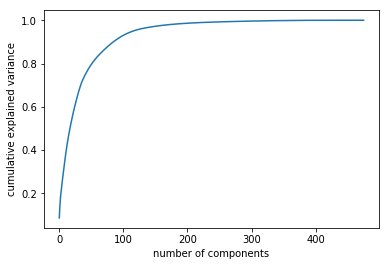

In [224]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA().fit(cat_df_ready)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [264]:
pca_0 = PCA(250).fit(X_train)
X_train_pca = pca_0.transform(X_train)
X_test_pca = pca_0.transform(X_test)

model_0 = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
model_0.fit(X_train_pca, y_train)
y_pred_forest_short = model_0.predict(X_test_pca)
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.62      0.68      0.65      8908
          1       0.79      0.73      0.76     14267

avg / total       0.72      0.72      0.72     23175



In [265]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_forest_short)

0.6857873639305063

In [227]:
from sklearn import ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

def short_soft_voting(df_res, y):
    clf2 = forest_cls
    clf3 = AdaBoost_cls
    clf5 = LogReg_class_cls
    clf7 = SGDC_class_cls
    clf9 = DecTree_class_cls
    eclf = VotingClassifier(estimators=[('forest', clf2),
                                        ('ada', clf3),
                                        ('log_reg', clf5),
                                        ('sgdc', clf7),
                                       ('dectree', clf9)],
                                voting='soft',
                                weights=[1, 1, 1, 1, 1])
    for clf, label in zip([clf2, clf3, clf5, clf7, clf9, eclf],
                          ['RandomForestClassifier',
                           'ADABoosting',
                           'LogReg',
                           'SGDC',
                           'DecTree',
                           'Ensemble']):
        scores = cross_val_score(
                clf, df_res, y, cv=5, n_jobs=-1, scoring='roc_auc')
        print(
                "ROC_AUC scoring: %0.3f (+/- %0.3f) [%s]" % (
                        scores.mean(), scores.std(), label))
    return eclf

In [228]:
e_cls = short_soft_voting(cat_df_ready, y_train_total)

ROC_AUC scoring: 0.589 (+/- 0.042) [RandomForestClassifier]
ROC_AUC scoring: 0.601 (+/- 0.053) [ADABoosting]
ROC_AUC scoring: 0.600 (+/- 0.043) [LogReg]
ROC_AUC scoring: 0.602 (+/- 0.042) [SGDC]
ROC_AUC scoring: 0.600 (+/- 0.043) [DecTree]
ROC_AUC scoring: 0.607 (+/- 0.047) [Ensemble]


In [229]:
e_cls.fit(cat_df_ready, y_train_total)

VotingClassifier(estimators=[('forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weigh... penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[1, 1, 1, 1, 1])

In [230]:
res = e_cls.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [231]:
roc_auc_score(res, y_test)

0.6384176986572738

In [262]:
pca_1 = PCA(320).fit(cat_df_ready)
X_pca = pca_1.transform(cat_df_ready)

In [263]:
e_cls_short = short_soft_voting(X_pca, y_train_total)

ROC_AUC scoring: 0.622 (+/- 0.023) [RandomForestClassifier]
ROC_AUC scoring: 0.599 (+/- 0.037) [ADABoosting]
ROC_AUC scoring: 0.600 (+/- 0.043) [LogReg]
ROC_AUC scoring: 0.601 (+/- 0.041) [SGDC]
ROC_AUC scoring: 0.600 (+/- 0.043) [DecTree]
ROC_AUC scoring: 0.613 (+/- 0.043) [Ensemble]


Проверяем тестовые данные

In [248]:
test_df = read_data(PATH_TO_DATA, TEST_FILE)

In [249]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40559 entries, 0 to 40558
Data columns (total 8 columns):
cgsettlementbufferid    40559 non-null int64
mcc                     40559 non-null int64
tranccy                 40559 non-null int64
ccy                     40559 non-null int64
amount                  40559 non-null int64
location                40559 non-null object
trandatetime            40559 non-null int64
clientid                40559 non-null int64
dtypes: int64(7), object(1)
memory usage: 2.5+ MB


In [250]:
test_df = test_df.drop(['cgsettlementbufferid'], axis=1)

In [251]:
test_df['amount'] = cat_df.apply(min_max_amount, axis=1)

In [252]:
test_df['year'] = test_df['trandatetime'].apply(lambda x: get_year(x))
test_df['month'] = test_df['trandatetime'].apply(lambda x: get_month(x))
test_df['week'] = test_df['trandatetime'].apply(lambda x: get_week(x))
test_df['day'] = test_df['trandatetime'].apply(lambda x: get_day(x))
test_df['hour'] = test_df['trandatetime'].apply(lambda x: get_hour(x))
test_df['country'] = test_df['location'].apply(lambda x: get_country(x))
test_df['city'] = test_df['location'].apply(lambda x: get_city(x))
test_df['institution'] = test_df['location'].apply(lambda x: get_inst(x))

In [253]:
test_df['country'] = test_df['country'].apply(lambda x: get_normal_country(x))

In [254]:
test_df['city'] = test_df['city'].apply(lambda x: get_normal_city(x))

In [255]:
test_df['mcc'] = test_df['mcc'].apply(lambda x: get_normal_mcc(x))

In [256]:
test_df = test_df.apply(money_exchange, axis=1)

In [257]:
for cat in category_to_dummies:
    dummies = pd.get_dummies(test_df[cat])
    #dummies.info()
    test_df = pd.concat([test_df, dummies], axis=1)
    
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40559 entries, 0 to 40558
Columns: 436 entries, mcc to no city
dtypes: float64(2), int64(4), object(10), uint8(420)
memory usage: 21.2+ MB


In [258]:
test_df_ready = test_df.drop(['mcc', 'tranccy', 'ccy', 'year', 'month', 'week', 'day', 'hour', 'country', 'city', 'institution', 'location', 'trandatetime'], axis=1)

In [259]:
test_df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40559 entries, 0 to 40558
Columns: 423 entries, amount to no city
dtypes: float64(2), int64(1), uint8(420)
memory usage: 17.2 MB
